# One dimensional interpolation experiment, Figure 2

In this notebook, we provide a minimal example reproducing Figure 2 from ablation study in section 3.6. This notebook can be used to play around with the Score Estimator network, particularly when trying out different normalization techniques.

In [1]:
import haiku as hk
import warnings
warnings.filterwarnings("ignore")

We first initialize the Score Estimator and choose no normalization. However, the following penalties are available:

- Exact score matching, as "exact_sm"
- Score matching with gradient penalties, as "exact_w_grad_pen"
- Score matching with spectral normalization, as "exact_w_spectr_norm"
- Score matching with spectral penalties, as "exact_w_spectr_prn"
- Score matching with RKHS norm penalties, as "exact_w_kern_pen"

Training score network:  49%|████▉     | 98/200 [00:29<00:05, 19.62it/s] 

Cos. sim. is :  0.5810444  MSE is:  1.0599527


Training score network: 100%|██████████| 200/200 [00:35<00:00,  5.59it/s]


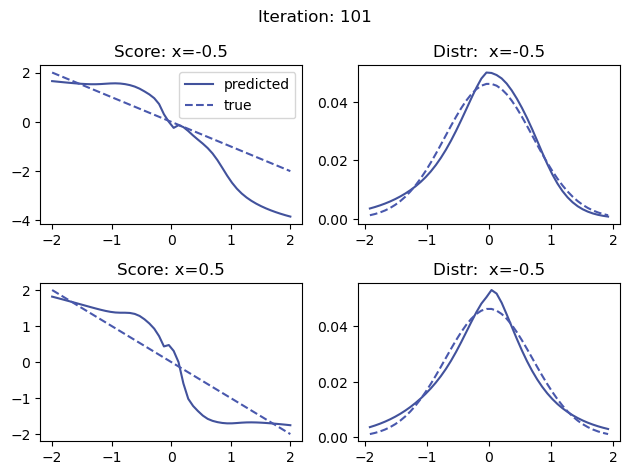

In [2]:
from MARS.experiments.run_interp_1d import ScoreEstimator

seed = 1234
hk_key = hk.PRNGSequence(seed)

# initializer score network
score_net = ScoreEstimator(learning_rate=1e-3, loss_type="exact_sm")
# train score network
score_net.train(n_iter=200, n_fns=10, key=hk_key, log_iter=100)

From the output above, we can see that the predicted scores are non-smooth. We invite the interested reader to try different distributions and/or less data points, in order to truly understand the pitfalls of the non-regularized score estimation!

Now, we choose the spectral normalization method, which is finally used in the MARS framework.

Training score network:  50%|█████     | 101/200 [00:09<00:04, 22.61it/s]

Cos. sim. is :  0.89544594  MSE is:  0.24756122


Training score network: 100%|██████████| 200/200 [00:11<00:00, 16.78it/s]


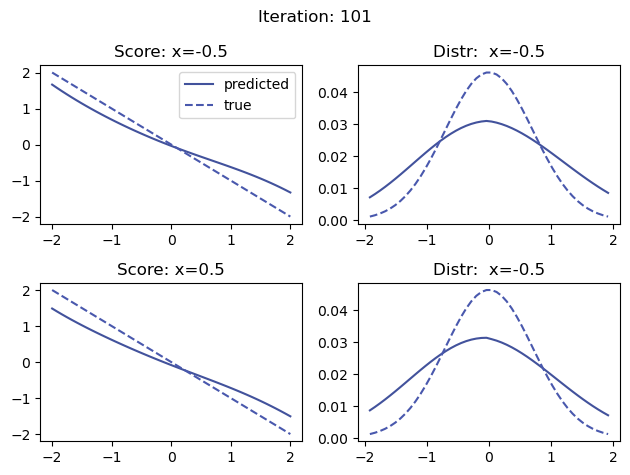

In [3]:
from MARS.experiments.run_interp_1d import ScoreEstimator

seed = 1234
hk_key = hk.PRNGSequence(seed)

# initializer score network
score_net = ScoreEstimator(learning_rate=1e-3, loss_type="exact_w_spectr_norm")
# train score network
score_net.train(n_iter=200, n_fns=10, key=hk_key, log_iter=100)

From the outputs above we can already see how the predicted scores are much smoother and that spectral normalization also aids in preventing variance underestimation!